In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import joblib
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.compose import make_column_transformer  
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [200]:
df = pd.read_csv('risk_factors_cervical_cancer.csv')

In [201]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [203]:
df.describe()

,Age,Smokes (packs/year),STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,845.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.453144,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,2.226610,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,37.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    object 
 2   First sexual intercourse            858 non-null    object 
 3   Num of pregnancies                  858 non-null    object 
 4   Smokes                              858 non-null    object 
 5   Smokes (years)                      858 non-null    object 
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             858 non-null    object 
 8   Hormonal Contraceptives (years)     858 non-null    object 
 9   IUD                                 858 non-null    object 
 10  IUD (years)                         858 non-null    object 
 11  STDs                                858 non-n

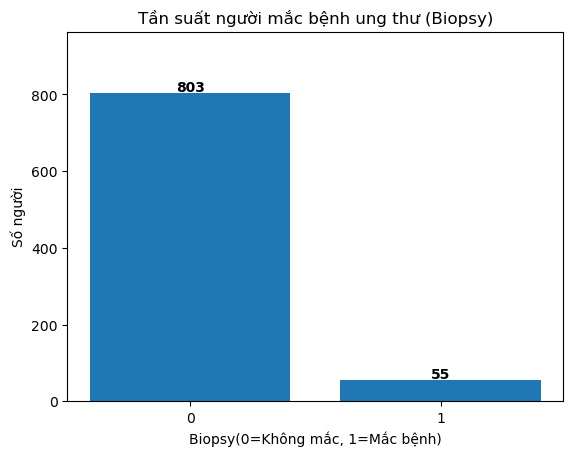

In [205]:

counts = df['Biopsy'].value_counts().sort_index()

# Tạo biểu đồ cột
plt.bar(counts.index, counts.values)
plt.xlabel('Biopsy(0=Không mắc, 1=Mắc bệnh)')
plt.ylabel('Số người')
plt.title('Tần suất người mắc bệnh ung thư (Biopsy)')
plt.xticks([0, 1])
for i, v in enumerate(counts.values):
    plt.text(counts.index[i], v + 5, str(v), ha='center', fontweight='bold')

plt.ylim(0, max(counts.values)*1.2)  # Tăng khoảng cách trục y cho chữ số dễ nhìn
plt.show()

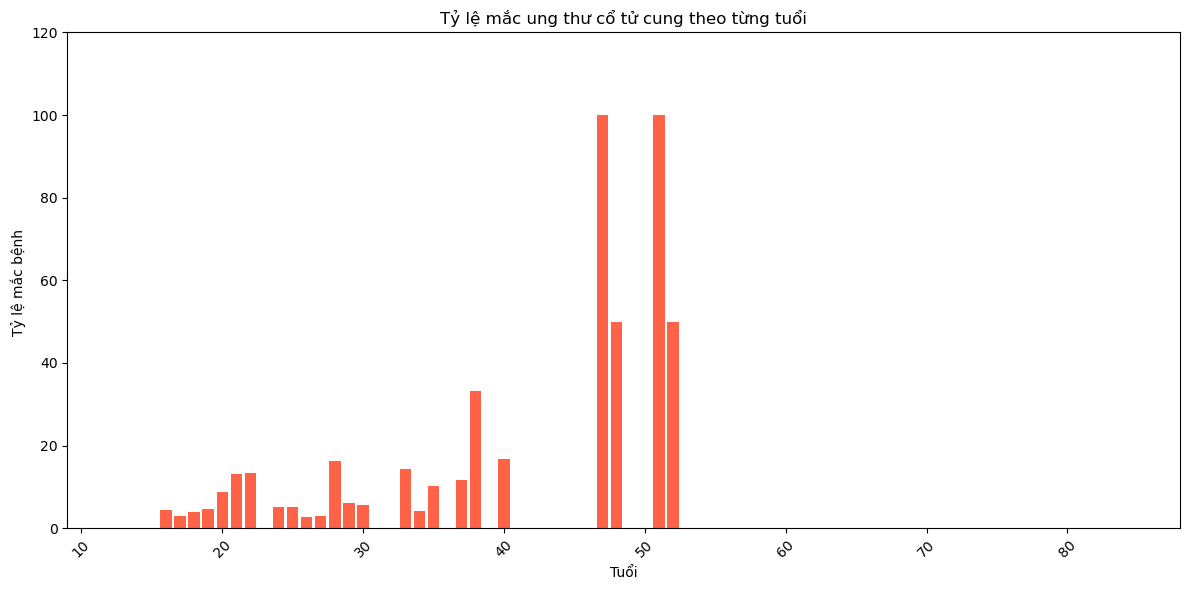

In [206]:
# Tổng số người theo tuổi
total_by_age = df['Age'].value_counts().sort_index()

# Số người mắc bệnh theo tuổi
biopsy_by_age = df[df['Biopsy'] == 1]['Age'].value_counts().sort_index()

# Tính tỷ lệ mắc bệnh theo tuổi
risk_rate = (biopsy_by_age / total_by_age).fillna(0)

# Vẽ biểu đồ
plt.figure(figsize=(12,6))
plt.bar(risk_rate.index, risk_rate.values * 100, color='tomato')
plt.xlabel('Tuổi')
plt.ylabel('Tỷ lệ mắc bệnh ')
plt.title('Tỷ lệ mắc ung thư cổ tử cung theo từng tuổi')
plt.xticks(rotation=45)

# Ghi phần trăm lên cột


plt.ylim(0, max(risk_rate.values)*100 * 1.2)
plt.tight_layout()
plt.show()



C:\Users\ngwxa\AppData\Local\Temp\ipykernel_1440\3692250577.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby('smoke_bin')['Biopsy'].mean() * 100  # dạng %


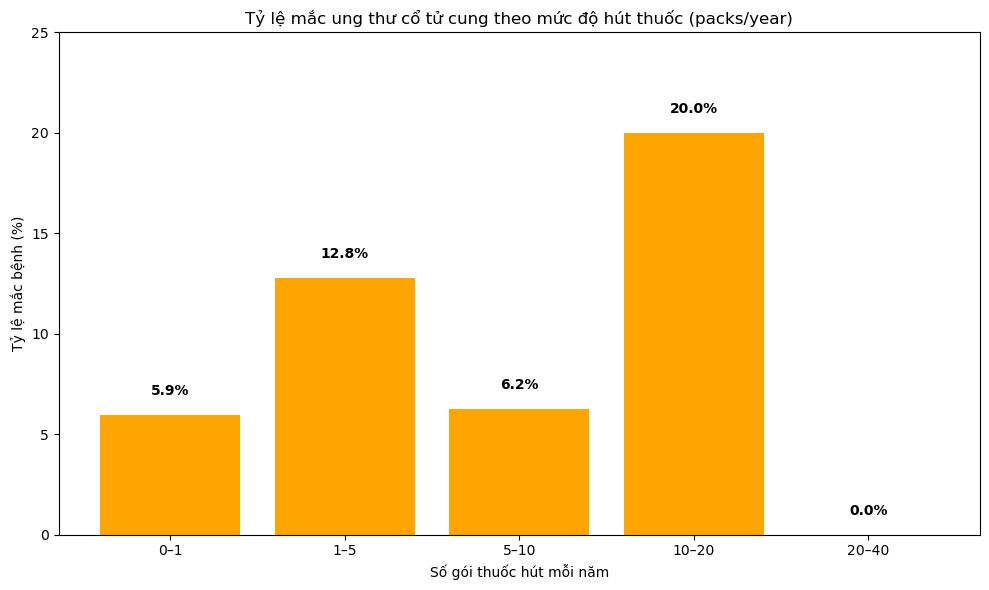

In [207]:
# Chuyển cột về số nếu chưa
df['Smokes (packs/year)'] = pd.to_numeric(df['Smokes (packs/year)'], errors='coerce')
df['Biopsy'] = pd.to_numeric(df['Biopsy'], errors='coerce')

# Bỏ NaN
df_temp = df[['Smokes (packs/year)', 'Biopsy']].dropna()

# Chia thành các nhóm (bins) theo mức độ hút thuốc
bins = [0, 1, 5, 10, 20, 40, 100]  # Tuỳ chọn
labels = ['0–1', '1–5', '5–10', '10–20', '20–40', '40+']
df_temp['smoke_bin'] = pd.cut(df_temp['Smokes (packs/year)'], bins=bins, labels=labels, right=False)

# Tính tỷ lệ mắc bệnh trong mỗi nhóm
grouped = df_temp.groupby('smoke_bin')['Biopsy'].mean() * 100  # dạng %

# Vẽ biểu đồ
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(grouped.index.astype(str), grouped.values, color='orange')
plt.xlabel('Số gói thuốc hút mỗi năm')
plt.ylabel('Tỷ lệ mắc bệnh (%)')
plt.title('Tỷ lệ mắc ung thư cổ tử cung theo mức độ hút thuốc (packs/year)')

# Ghi số
for i, val in enumerate(grouped.values):
    plt.text(i, val + 1, f"{val:.1f}%", ha='center', fontweight='bold')

plt.ylim(0, max(grouped.values)*1.25)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Biểu đồ dữ liệu thiếu ban đầu')

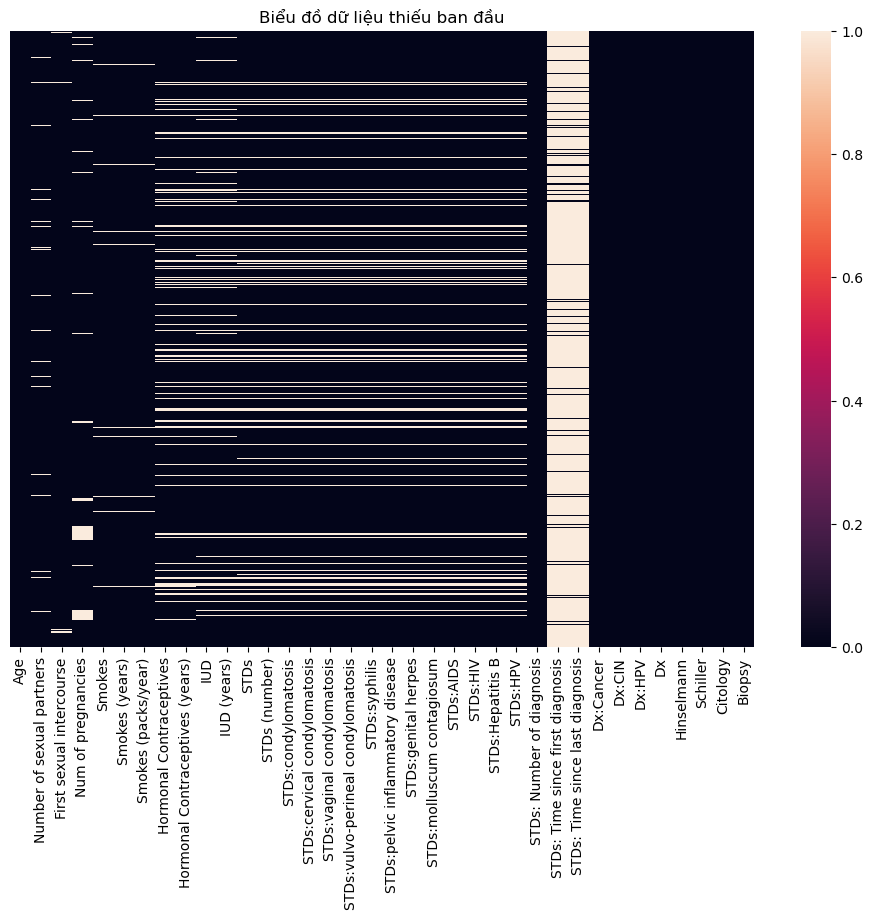

In [208]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load lại dữ liệu gốc
df_raw = pd.read_csv("risk_factors_cervical_cancer.csv")  # hoặc tên file gốc của bạn


# Thay thế dấu '?' thành NaN nếu có
df_raw.replace('?', pd.NA, inplace=True)

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_raw.isnull(), yticklabels=False)
plt.title("Biểu đồ dữ liệu thiếu ban đầu")

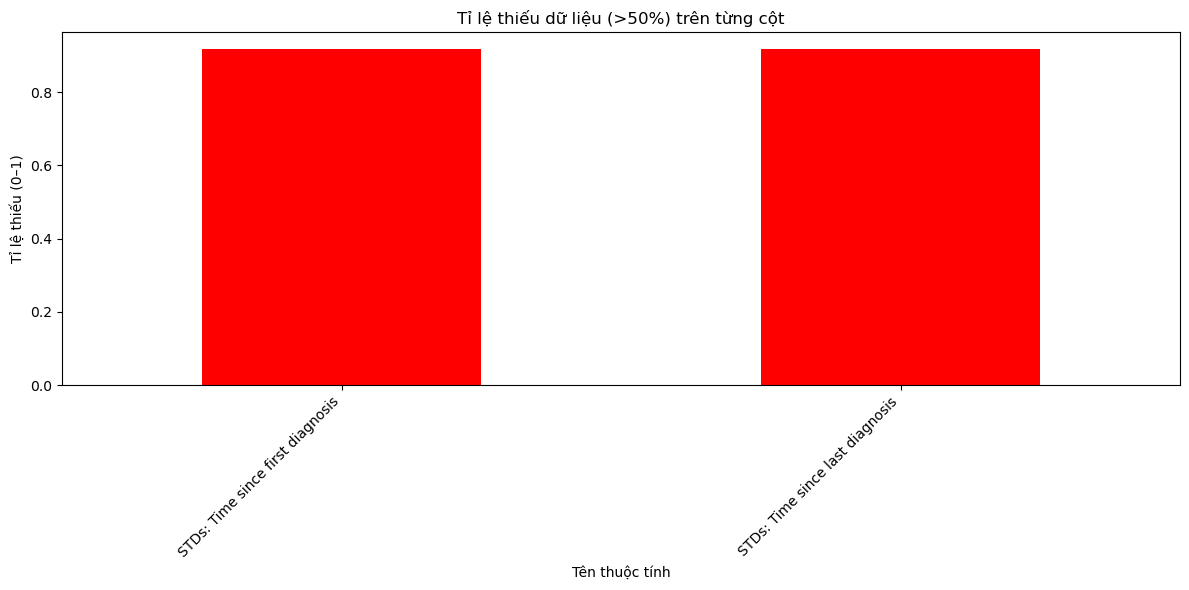

C:\Users\ngwxa\AppData\Local\Temp\ipykernel_1440\2121869920.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\ngwxa\AppData\Local\Temp\ipykernel_1440\2121869920.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

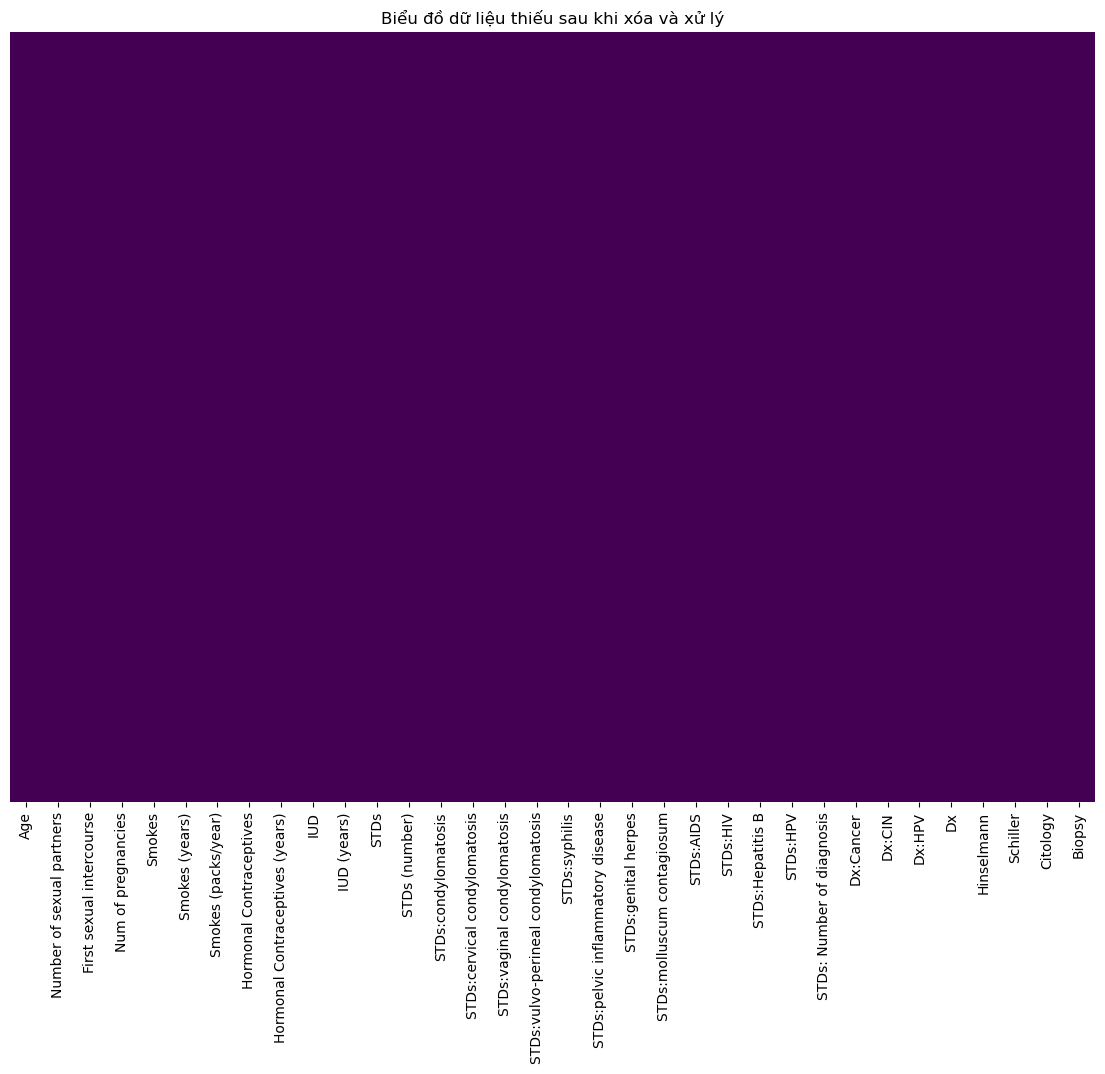

In [209]:


# 1. Đọc dữ liệu và thay '?' bằng NaN
df = pd.read_csv("risk_factors_cervical_cancer.csv")
df.replace('?', pd.NA, inplace=True)

# 2. Chuyển toàn bộ cột về số, các giá trị không chuyển được sẽ thành NaN
df = df.apply(pd.to_numeric, errors='coerce')

# 3. Tính tỷ lệ dữ liệu bị thiếu trên mỗi cột
missing_ratio = df.isnull().mean()

# Lọc và lấy tỉ lệ thiếu của các cột > 50%
missing_over_50 = missing_ratio[missing_ratio > 0.5]

# Vẽ biểu đồ
plt.figure(figsize=(12,6))
missing_over_50.sort_values(ascending=False).plot(kind='bar', color='red')
plt.title("Tỉ lệ thiếu dữ liệu (>50%) trên từng cột")
plt.ylabel("Tỉ lệ thiếu (0–1)")
plt.xlabel("Tên thuộc tính")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# 5. Xóa các cột đó
# 5. Xóa các cột đó
df.drop(columns=missing_over_50.index, inplace=True)


# 6. Điền phần còn lại:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        # Nếu số lượng giá trị duy nhất nhỏ (ví dụ <= 10), coi như rời rạc
        if df[col].nunique() <= 1:
            # Điền bằng mode
            mode_val = df[col].mode()
            if not mode_val.empty:
                df[col].fillna(mode_val[0], inplace=True)
        else:
            # Điền bằng trung bình
            df[col].fillna(df[col].mean(), inplace=True)

# 7. Vẽ heatmap để xác nhận
plt.figure(figsize=(14, 10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Biểu đồ dữ liệu thiếu sau khi xóa và xử lý")
plt.show()


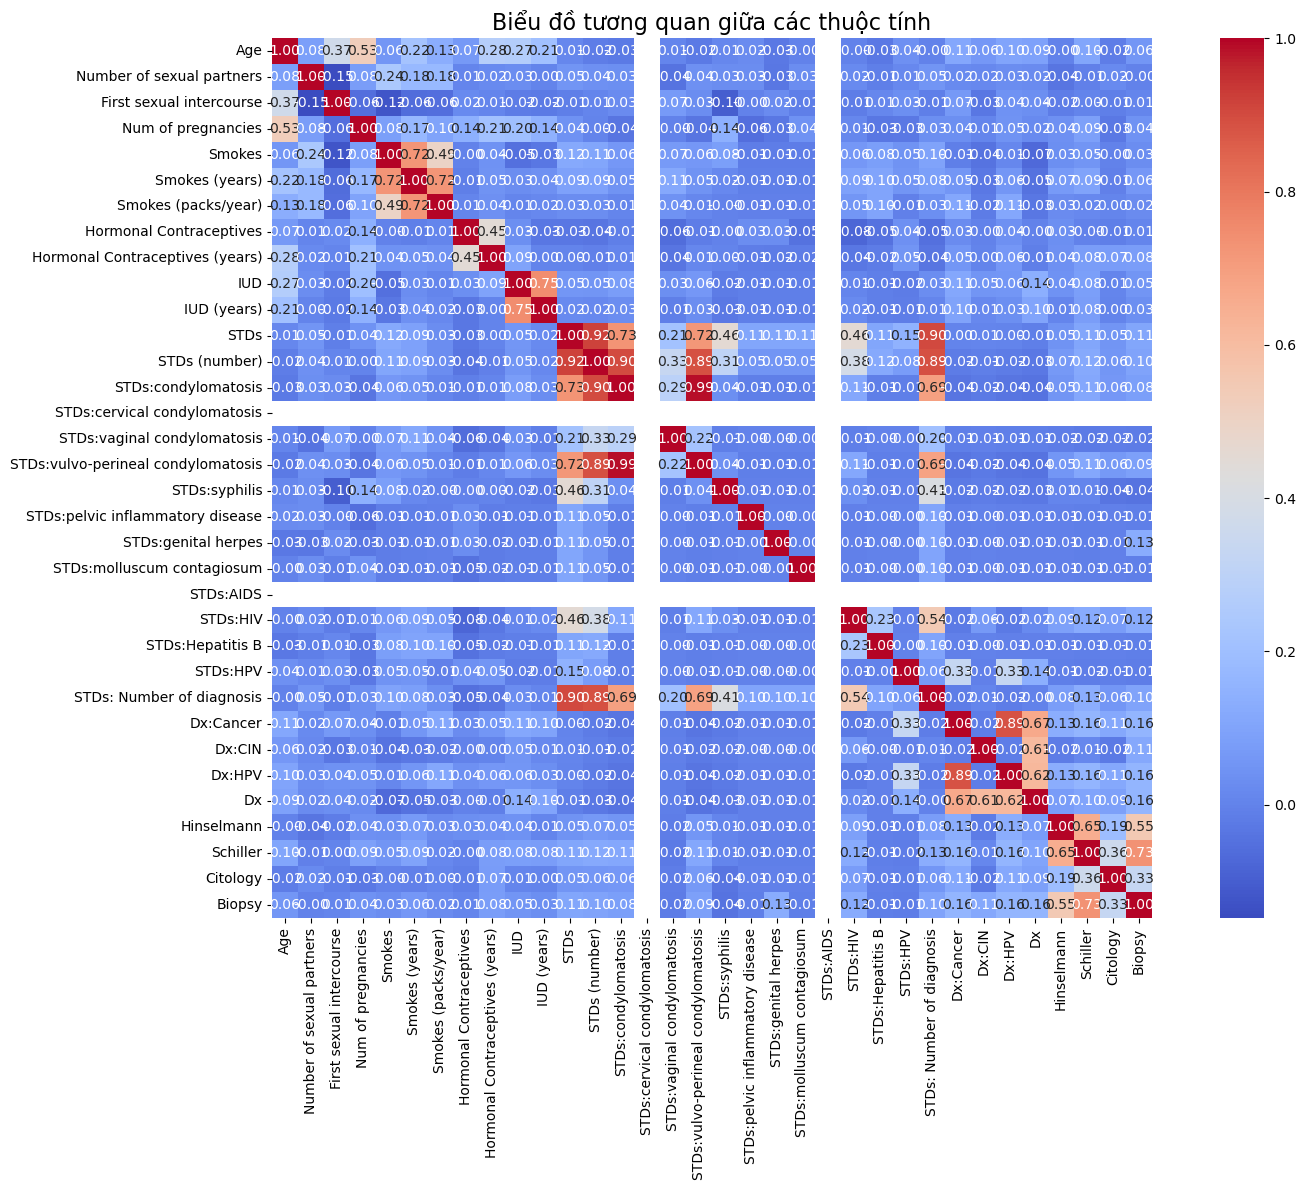

In [210]:
# 1. Tính ma trận tương quan giữa các thuộc tính
correlation_matrix = df.corr()

# 2. Vẽ heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True,
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns)

plt.title("Biểu đồ tương quan giữa các thuộc tính", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [211]:

# 6. Tách X và y
X = df.drop('Biopsy', axis=1)
y = df['Biopsy']

In [212]:
print(y.value_counts())
print(y.value_counts(normalize=True))  # để thấy tỉ lệ %

Biopsy
0    803
1     55
Name: count, dtype: int64
Biopsy
0    0.935897
1    0.064103
Name: proportion, dtype: float64


In [ ]:
from sklearn.compose import make_column_transformer

# X đã được chuẩn hóa thành DataFrame số, nhưng có thể chứa NaN
binary_cols = []
for col in X.columns:
    unique_vals = X[col].dropna().unique()
    if set(unique_vals).issubset({0, 1}):  # chỉ gồm 0 và 1
        binary_cols.append(col)

# Còn lại là numerical
numerical_cols = [col for col in X.columns if col not in binary_cols]

# Tạo các imputer
binary_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='mean')

# Gộp lại
full_imputer = make_column_transformer(
    (numerical_imputer, numerical_cols),
    (binary_imputer, binary_cols)
)

# Thực hiện điền giá trị thiếu
X_imputed = full_imputer.fit_transform(X)

# ✅ Nếu cần, bạn có thể biến lại thành DataFrame với cột đúng:
X_imputed = pd.DataFrame(X_imputed, columns=numerical_cols + binary_cols)



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
# Bước 2: Cân bằng dữ liệu với SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

# Kiểm tra lại
print("✅ Nhãn sau khi SMOTE:")
print(y_resampled.value_counts())


✅ Nhãn sau khi SMOTE:
Biopsy
0    803
1    803
Name: count, dtype: int64


In [214]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=1/3.0, random_state=42, stratify=y_resampled
)

In [215]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [216]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.642267,2.791883,1.399325,0.350189,4.057885,2.209657,0.448671,3.519082,0.293260,...,0.048244,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.256419,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [217]:
def evaluate_model(model, X, y, k=10):
    accuracy_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, zero_division=0))
        precision_scores.append(precision_score(y_test, y_pred, zero_division=0))
        recall_scores.append(recall_score(y_test, y_pred, zero_division=0))

    print("=== Evaluation Results ===")
    print(f"Accuracy :  {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
    print(f"F1-score :  {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
    print(f"Precision:  {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
    print(f"Recall   :  {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")

    # ✅ Fit lại mô hình trên toàn bộ tập dữ liệu
    model.fit(X, y)
    return model

    

1.  Accuracy (Độ chính xác tổng thể)
    Accuracy là tỷ lệ số mẫu mà mô hình dự đoán đúng trên tổng số mẫu.
📎 Ví dụ: nếu có 100 người, mô hình dự đoán đúng 90 người → Accuracy = 90%.

2. Precision (Độ chính xác của dự đoán dương tính)
    Precision đo lường xem trong các lần mô hình dự đoán là “có bệnh”, thì bao nhiêu phần trăm là đúng.
🧠 Ví dụ: Nếu mô hình nói 10 người “có bệnh” mà chỉ 6 người thật sự mắc bệnh → Precision = 0.6.

3. Recall (Độ bao phủ ca thật sự dương tính)
Recall đo lường xem mô hình bắt được bao nhiêu phần trăm số ca thật sự mắc bệnh.
🧠 Ví dụ: Có 10 người thật sự mắc bệnh, mô hình chỉ bắt được 6 người → Recall = 0.6.
 
4. F1-score (Điểm cân bằng giữa Precision và Recall)
 F1-score là trung bình điều hòa của Precision và Recall.
Nó cân bằng giữa việc dự đoán đúng ca bệnh và không bỏ sót ca bệnh.
🧠 Nếu Precision = 1 và Recall = 0, thì F1 = 0 (nghĩa là mất cân bằng → không tốt).

=== Evaluation Results ===
Accuracy :  0.9577 ± 0.0144
F1-score :  0.9576 ± 0.0141
Precision:  0.9543 ± 0.0212
Recall   :  0.9614 ± 0.0202


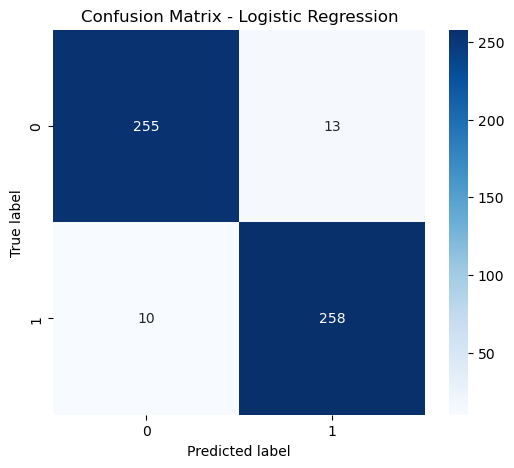

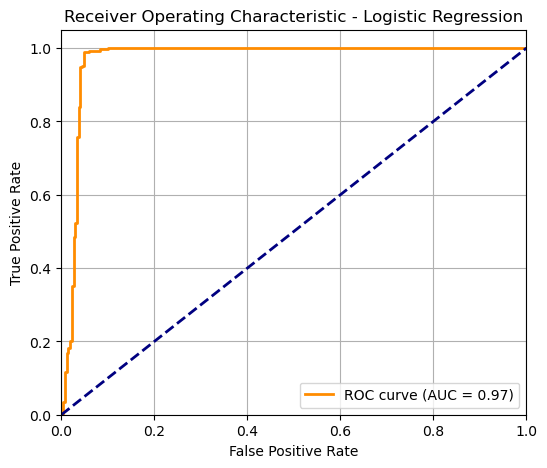

['imputer.pkl']

In [218]:


# 1. Khởi tạo và đánh giá mô hình trên dữ liệu đã SMOTE
model = LogisticRegression(max_iter=1000)

# Đánh giá bằng K-Fold và fit lại trên toàn bộ dữ liệu SMOTE
model = evaluate_model(model, pd.DataFrame(X_resampled), y_resampled)



X_train_cm, X_test_cm, y_train_cm, y_test_cm = train_test_split(
    X_resampled, y_resampled, test_size=1/3.0, stratify=y_resampled, random_state=42
)

# 3. Dự đoán để trực quan hóa
y_pred_cm = model.predict(X_test_cm)


# 4. Vẽ Confusion Matrix
cm = confusion_matrix(y_test_cm, y_pred_cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

import joblib
from sklearn.metrics import roc_curve, auc

# 5. Tính xác suất dự đoán (predict_proba) để vẽ ROC
y_proba = model.predict_proba(X_test_cm)[:, 1]

# 6. Tính các giá trị cho ROC curve
fpr, tpr, thresholds = roc_curve(y_test_cm, y_proba)
roc_auc = auc(fpr, tpr)

# 7. Vẽ đường ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

joblib.dump(model, 'logistic_model.pkl')     # Tên file dành cho Flask hoặc tải lại
joblib.dump(full_imputer, 'imputer.pkl')     # Nếu bạn có dùng imputer



=== Evaluation Results ===
Accuracy :  0.9713 ± 0.0122
F1-score :  0.9714 ± 0.0127
Precision:  0.9640 ± 0.0187
Recall   :  0.9791 ± 0.0135


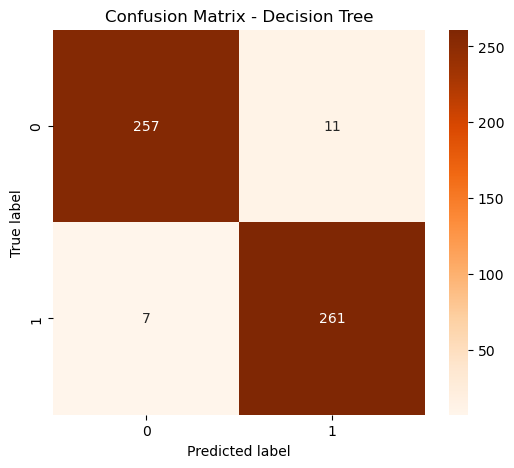

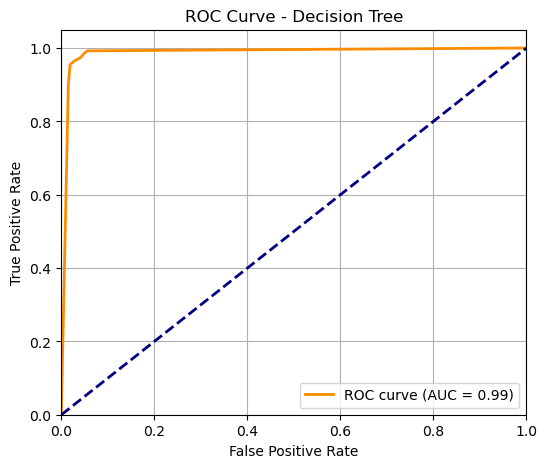

['imputer.pkl']

In [219]:


# 1. Khởi tạo và đánh giá mô hình trên dữ liệu đã SMOTE
de_model = DecisionTreeClassifier(
    max_depth=4,
    min_samples_leaf=10,
    min_samples_split=20,
    random_state=42
)

# Đánh giá bằng K-Fold và fit lại trên toàn bộ dữ liệu SMOTE
de_model = evaluate_model(de_model, pd.DataFrame(X_resampled), y_resampled)

# 2. Chia lại dữ liệu để trực quan hóa (vẫn dùng dữ liệu SMOTE)
from sklearn.model_selection import train_test_split

X_train_cm, X_test_cm, y_train_cm, y_test_cm = train_test_split(
    X_resampled, y_resampled, test_size=1/3.0, stratify=y_resampled, random_state=42
)

# 3. Dự đoán để trực quan hóa
y_pred_cm = de_model.predict(X_test_cm)


# 4. Vẽ Confusion Matrix
cm = confusion_matrix(y_test_cm, y_pred_cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# 5. Lấy xác suất dự đoán từ mô hình (cột thứ 2 tương ứng class = 1)
y_proba = de_model.predict_proba(X_test_cm)[:, 1]

# 6. Tính ROC và AUC
fpr, tpr, thresholds = roc_curve(y_test_cm, y_proba)
roc_auc = auc(fpr, tpr)

# 7. Vẽ đường ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

joblib.dump(de_model, 'decision_tree_model.pkl')  # Lưu mô hình cây quyết định
joblib.dump(full_imputer, 'imputer.pkl')          # Cùng imputer nếu có


=== Evaluation Results ===
Accuracy :  0.9763 ± 0.0078
F1-score :  0.9763 ± 0.0083
Precision:  0.9676 ± 0.0171
Recall   :  0.9855 ± 0.0122


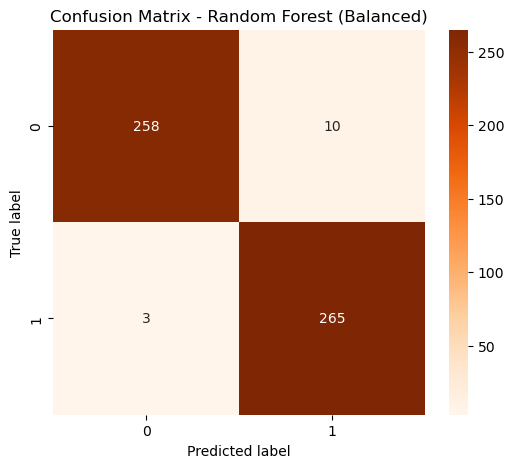

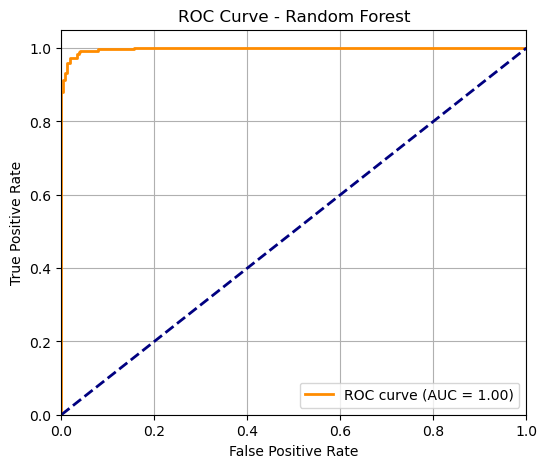

['imputer.pkl']

In [220]:

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=6,
    min_samples_leaf=5,
    min_samples_split=10,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf_model = evaluate_model(rf_model, pd.DataFrame(X_resampled), y_resampled)



X_train_cm, X_test_cm, y_train_cm, y_test_cm = train_test_split(
    X_resampled, y_resampled, test_size=1/3.0, stratify=y_resampled, random_state=42
)



y_pred_cm = rf_model.predict(X_test_cm)

# 4. Vẽ Confusion Matrix
cm = confusion_matrix(y_test_cm, y_pred_cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Random Forest (Balanced)")
plt.show()

# 5. Xác suất dự đoán cho class 1
y_proba = rf_model.predict_proba(X_test_cm)[:, 1]

# 6. Tính ROC và AUC
fpr, tpr, thresholds = roc_curve(y_test_cm, y_proba)
roc_auc = auc(fpr, tpr)

# 7. Vẽ đường ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# 8. Lưu mô hình
joblib.dump(rf_model, 'random_forest_model.pkl')  # tên file giữ nguyên để Flask dùng
joblib.dump(full_imputer, 'imputer.pkl')            # nếu bạn có dùng imputer (fit trước đó)